# Graded Challenge 3

`M Naufal Indriatmoko` -- *FTDS Batch 10*


## **Description**

### *Objective*

To evaluate the coder understanding in *Practical Statistics*.

### *Problem Statement*

Given dataset from Kaggle, execute some statistical analysis on the data (Measure pf Central Tendency, Variance, and Hypothesis Testing).

## **Working Area**

I. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

II. Data Loading

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.shape

(378661, 15)

The dataset contains information of the projects in a crowdfunding platform `Kickstarter` in the year 2018. There are 378,661 projects recorded in the dataset.

III. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Column `name` has 4 missing values and column `usd pledged` has 3,797 missing values.

Checking the missing values:

In [6]:
df[df['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [7]:
df[df['usd pledged'].isnull()].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


Removing the missing values from the dataset for easier analysis.

In [8]:
df.dropna(inplace=True)
df.shape

(374860, 15)

In [9]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

The dataset is now free of missing values and ready for next steps,

IV. Data Analysis

Checking out `main_category` column.

In [10]:
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [11]:
df['main_category'].mode()

0    Film & Video
dtype: object

<AxesSubplot:>

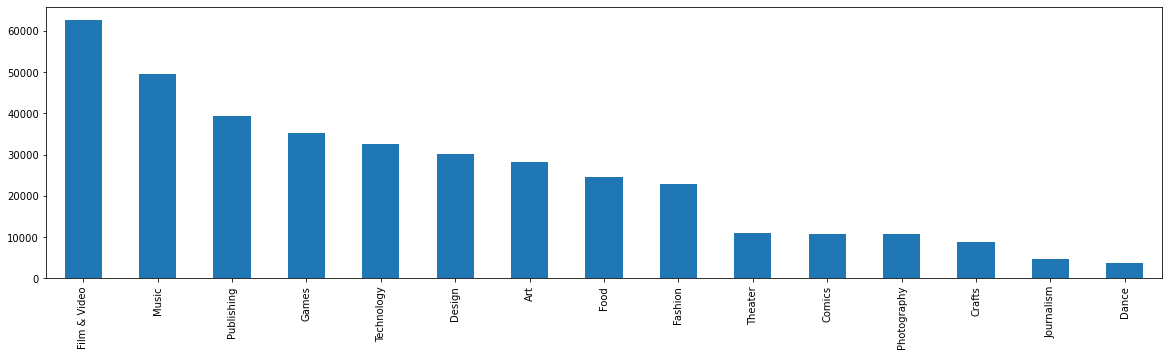

In [12]:
df['main_category'].value_counts().plot(figsize=(20,5), kind='bar')

There are several `main_category` listed in the dataset, as can be seen above. The one that appears the most is `Film & Video`.

Let's shrink down the dataset. 

Picking *successful* projects from **Technology** and **Food** as the object of interest. We then compare the `usd_pledged_real` in both of them.

In [13]:
tech_s = df[(df['main_category'] == 'Technology') & (df['state'] == 'successful')]
tech_s.shape

(6433, 15)

In [14]:
food_s = df[(df['main_category'] == 'Food') & (df['state'] == 'successful')]
food_s.shape

(6085, 15)

Measure of Central Tendency

In [15]:
print(tech_s['usd_pledged_real'].mean())
print(tech_s['usd_pledged_real'].median())
print(tech_s['usd_pledged_real'].mode())
print('\n')
print(food_s['usd_pledged_real'].mean())
print(food_s['usd_pledged_real'].median())
print(food_s['usd_pledged_real'].mode())

92670.79470387062
22471.0
0    1001.0
dtype: float64


17349.390516023028
8951.82
0    5000.0
dtype: float64


*Measure of Central Tendency summary result:*

tech_s `usd_pledged_real` :
* mean = 92670.794
* median = 22471.0
* mode = 1001.0

food_s `usd_pledged_real` :
* mean = 17349.390
* median = 8951.82
* mode = 5000.0

Measure of Variance

In [16]:
tech_s_range = tech_s['usd_pledged_real'].max() - tech_s['usd_pledged_real'].min()
print('tech_s usd_pledged_real range =', tech_s_range)
tech_s_var = tech_s['usd_pledged_real'].var()
print('tech_s usd_pledged_real variance =', tech_s_var)
tech_s_std = tech_s['usd_pledged_real'].std()
print('tech_s usd_pledged_real stdev =', tech_s_std)
print('\n')
food_s_range = food_s['usd_pledged_real'].max() - food_s['usd_pledged_real'].min()
print('food_s usd_pledged_real range =', food_s_range)
food_s_var = food_s['usd_pledged_real'].var()
print('food_s usd_pledged_real variance =', food_s_var)
food_s_std = food_s['usd_pledged_real'].std()
print('food_s usd_pledged_real stdev =', food_s_std)

tech_s usd_pledged_real range = 6225354.19
tech_s usd_pledged_real variance = 69914597171.97508
tech_s usd_pledged_real stdev = 264413.6856745034


food_s usd_pledged_real range = 1927216.0
food_s usd_pledged_real variance = 3693120122.425095
food_s usd_pledged_real stdev = 60771.04674452379


*Measure of variance summary result:*

tech_s `usd_pledged_real` :
* range = 6225354.19
* variance = 69914597171.975
* stdev = 264413.686

food_s `usd_pledged_real` :
* range = 1927216.0
* variance = 3693120122.425
* stdev = 60771.047

Question: is the `usd_pledged_real` mean of **tech_s** and **food_s** significantly different?

Hypothesis Testing: T-test 2 samples 2 tailed

* H0: $\mu$ tech_s = $\mu$ food_s
* H1: $\mu$ tech_s != $\mu$ food_s

In [17]:
t_stat, p_val = stats.ttest_ind(tech_s['usd_pledged_real'], food_s['usd_pledged_real'])
print('P-value: ', p_val)
print('t-statistics: ', t_stat)

P-value:  2.115945568041262e-102
t-statistics:  21.685845116728604


C:\Users\Naufal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naufal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-425570.50623765046


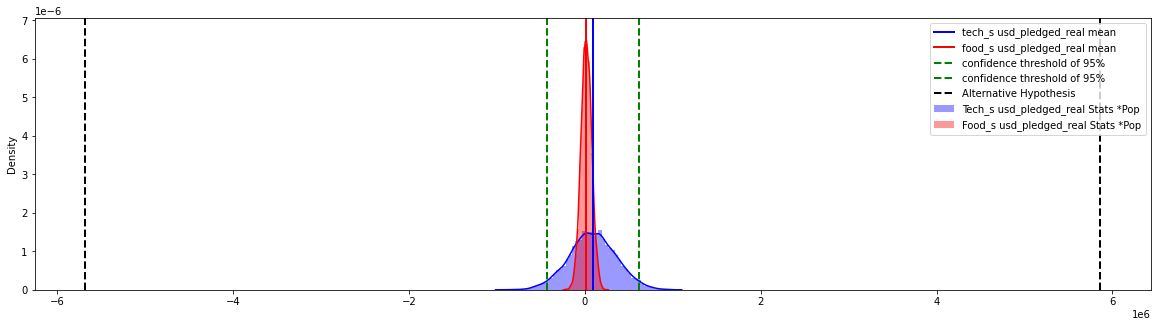

In [24]:
tech_s_pop = np.random.normal(tech_s['usd_pledged_real'].mean(),tech_s['usd_pledged_real'].std(),10000)
food_s_pop = np.random.normal(food_s['usd_pledged_real'].mean(),food_s['usd_pledged_real'].std(),10000)

# confidence interval based on Tech_s
# choose cv = 0.05 -> since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, tech_s['usd_pledged_real'].mean(), tech_s['usd_pledged_real'].std())

plt.figure(figsize=(20,5))
sns.distplot(tech_s_pop, label='Tech_s usd_pledged_real Stats *Pop',color='blue')
sns.distplot(food_s_pop, label='Food_s usd_pledged_real Stats *Pop',color='red')

# mean
plt.axvline(tech_s['usd_pledged_real'].mean(), color='blue', linewidth=2, label='tech_s usd_pledged_real mean')
plt.axvline(food_s['usd_pledged_real'].mean(), color='red',  linewidth=2, label='food_s usd_pledged_real mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(tech_s_pop.mean()+t_stat*tech_s_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(tech_s_pop.mean()-t_stat*tech_s_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

Hypothesis testing summary result:

P-value = 2.115e-102 which is far below the $\alpha$ (0.5) 

Black dashed-line (the alternative hypothesis) is located outside of the confidence interval.

So, H0 ($\mu$ tech_s = $\mu$ food_s) is rejected.

In another word, **the usd_pledged_real mean of tech_s and food_s are significantly different**.


#### More analysis

In [19]:
df[(df['state']=='successful')].groupby('main_category')['usd pledged'].mean()

main_category
Art              5420.993262
Comics           9178.678422
Crafts           4053.917054
Dance            4445.787994
Design          43550.117152
Fashion         15136.854025
Film & Video    12409.068566
Food            14227.414871
Games           41643.054423
Journalism       8598.269387
Music            6307.095057
Photography      7897.056082
Publishing       7257.911788
Technology      67237.094112
Theater          5289.165826
Name: usd pledged, dtype: float64

In [20]:
s_art = df[((df['state']=='successful') & (df['main_category']=='Art'))]['usd pledged']
s_art_mean = s_art.mean()
print('Mean usd pledged of successful Art projects: ', s_art_mean)

s_design = df[((df['state']=='successful') & (df['main_category']=='Design'))]['usd pledged']
s_design_mean = s_design.mean()
print('Mean usd pledged of successful Design projects: ', s_design_mean)

s_games = df[((df['state']=='successful') & (df['main_category']=='Games'))]['usd pledged']
s_games_mean = s_games.mean()
print('Mean usd pledged of successful Games projects: ', s_games_mean)

Mean usd pledged of successful Art projects:  5420.993262380506
Mean usd pledged of successful Design projects:  43550.11715233676
Mean usd pledged of successful Games projects:  41643.05442323053


Question: Are mean `usd pledged` of successful projects in main category Art, Design, and Games significantly different?

Hypothesis testing: ANOVA
* H0 : μArt = μDesign = μGames
* H1 : μArt != μDesign != μGames

In [21]:
f_stat, p_value = stats.f_oneway(s_art, s_design, s_games)
print('P-value: ', p_value)

P-value:  3.0581036943497704e-45


P-value is far below 0.5

So, H0 (μArt = μDesign = μGames) is rejected.

In another word, **the usd pledged mean of Art, Design, and Games are significantly different**.

## **Conclusions**

#### Measure of Central Tendency between successful projects in main category Technology and Food:
Technology - `usd_pledged_real` :
* mean = 92670.794
* median = 22471.0
* mode = 1001.0

Food - `usd_pledged_real` :
* mean = 17349.390
* median = 8951.82
* mode = 5000.0

#### Measure of Variance between successful projects in main category Technology and Food:
Technology - `usd_pledged_real` :
* range = 6225354.19
* variance = 69914597171.975
* stdev = 264413.686

Food - `usd_pledged_real` :
* range = 1927216.0
* variance = 3693120122.425
* stdev = 60771.047

#### Hypothesis testing result:
* The mean of `usd_pledged_real` of successful projects in main category **Technology** and **Food** are significantly different.
* The mean of `usd pledged` of successful projects in main category **Art**, **Design**, and **Games** are significantly different.